## Table of Contents

* [Column Names And Data](#Column_Names_And_Data)

* [Section 1.Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [Section 1.1 Check missing values](#Check_missing_values)
    * [Section 1.2 Restructure_the_data](#Restructure_the_data)
    * [Section1.3. Convert city_longitude, city_latitude to mercator coordinates](#convert)
* [Section 2.Create a map](#Create_a_map)
    * [Section 2.1 Import packages](#Import_packages)
    * [Section 2.2 Create an interactive map](#Create_an_interactive_map)

### Column Names And Data<a class="anchor" id="Column_Names_And_Data"></a>
* description - textual description with details of the haunting.
* location - A more detailed description of the haunted place's location.
* longitude - The longitude of the location (geocoded dataset only).
* latitude - The latitude of the location (geocoded dataset only).
* city - The city of the haunted place.
* city_longitude - The longitude of the city (geocoded dataset only).
* city_latitude - The latitude of the city (geocoded dataset only).
* state - The state of the haunted place.
* state_abbrev - The abbreviated state.
* country - The country of the haunted place. Currently only US.

##  Section 1. Exploratory Data Analysis <a class="anchor" id="Exploratory_Data_Analysis"></a>


### Import packages for data cleaning

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_haunted = pd.read_csv('haunted.csv')
df_haunted.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


In [3]:
df_haunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 858.9+ KB


### Section 1.1 Check missing values<a class="anchor" id="Check_missing_values"></a>  

In this project, checking missing values is very essential to help us decide which geocode values we are going to use. We will use those geocodes to create an interacitve map.

We need to check missing city_longtitude and city_latitude, and missing longtitude / missing latitude. Also need to consider some questions:

* How many rows are missing in column city_longtitude and column city_latitude? 

* What is the percentage of the missing values? 

* How is it going to make an impact on creating the map? 

All these questions need to be considered and to be measured. 

### Question 1: What are the missing values?

<AxesSubplot:>

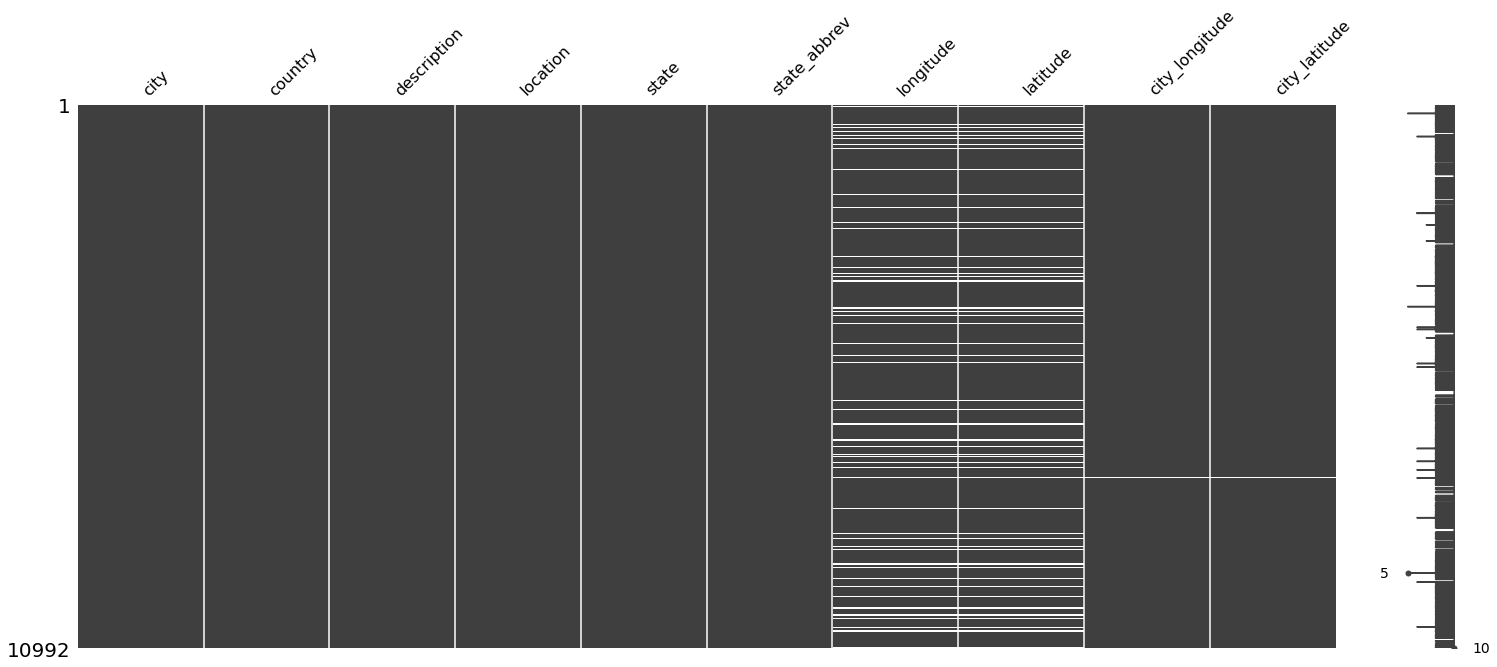

In [4]:
# Check how missing values are distributed across the dataset
msno.matrix(df_haunted)

In [5]:
# sum up the number of missing values in each column
df_haunted.isnull().sum()

city                 3
country              0
description          0
location             3
state                0
state_abbrev         0
longitude         1261
latitude          1261
city_longitude      29
city_latitude       29
dtype: int64

In [6]:
# percentage of missing values in each column

df_haunted.isnull().sum()/10992*100

city               0.027293
country            0.000000
description        0.000000
location           0.027293
state              0.000000
state_abbrev       0.000000
longitude         11.471980
latitude          11.471980
city_longitude     0.263828
city_latitude      0.263828
dtype: float64

### Summary of question 1: 
Longitude and latitude only reflect locations of haunted houses, and the missing values of those two columns are too significant.There are 1261 out of 10992 values, which brings to 11.47% of the data is missing.

city_longitude and city_latitude reflect city locations, and only have 0.26% of the data is missing. Therefore, we will use city_longitude and city_latitude for geographic display.

### Question 2: Are missing city_longitude and city_latitude significant enough for each state?

In [7]:
# check the state with missing geocode
filter_null = pd.isnull(df_haunted["city_latitude"]) 
missing_geo=df_haunted[filter_null]
missing_geo.head()


,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
78,Cockeysville,United States,Built over a cemetery where odd things always ...,Padonia Park Club,Michigan,MI,-76.671167,39.453642,NaN,NaN
176,NaN,United States,"Sadly, as of Jan. 6th, 2005, the Grand Theatre...",February 2005 Update,Michigan,MI,NaN,NaN,NaN,NaN
243,Kelloggsville,United States,A young girl in the 9th grade died in the math...,Kelloggsville High School,Michigan,MI,-85.665136,42.876738,NaN,NaN
643,Darktown,United States,"Reports of trolls, Hellhounds, human forms, ac...","""THE ALAMO""",Pennsylvania,PA,NaN,NaN,NaN,NaN
1625,<>Manteca,United States,Tthere have been may reports of children playi...,Sequoia elementary,California,CA,-122.068543,37.943595,NaN,NaN


In [8]:
missing_geo.shape

(29, 10)

In [9]:
# count state with missing geocode
missing_geo['state']. value_counts()

Georgia         3
Michigan        3
Indiana         3
Florida         2
Kansas          2
Arkansas        2
Ohio            2
Alabama         2
Minnesota       2
North Dakota    2
Illinois        1
New Mexico      1
California      1
Virginia        1
Pennsylvania    1
Vermont         1
Name: state, dtype: int64

In [10]:
# count percentage of  missing geocode in each state
missing_geo_code=pd.Series.sort_values(missing_geo['state']. value_counts()/df_haunted['state']. value_counts()*100,ascending=False)
missing_geo_code

North Dakota      3.448276
Arkansas          1.680672
Kansas            1.626016
Vermont           1.587302
New Mexico        1.282051
Minnesota         1.234568
Georgia           1.038062
Alabama           0.892857
Indiana           0.854701
Florida           0.609756
Michigan          0.567108
Virginia          0.520833
Ohio              0.419287
Illinois          0.253165
Pennsylvania      0.154083
California        0.093458
Alaska                 NaN
Arizona                NaN
Colorado               NaN
Connecticut            NaN
Delaware               NaN
Hawaii                 NaN
Idaho                  NaN
Iowa                   NaN
Kentucky               NaN
Louisiana              NaN
Maine                  NaN
Maryland               NaN
Massachusetts          NaN
Mississippi            NaN
Missouri               NaN
Montana                NaN
Nebraska               NaN
Nevada                 NaN
New Hampshire          NaN
New Jersey             NaN
New York               NaN
N

In [11]:
# missing_geo_code[missing_geo_code.notnull()]

<AxesSubplot:>

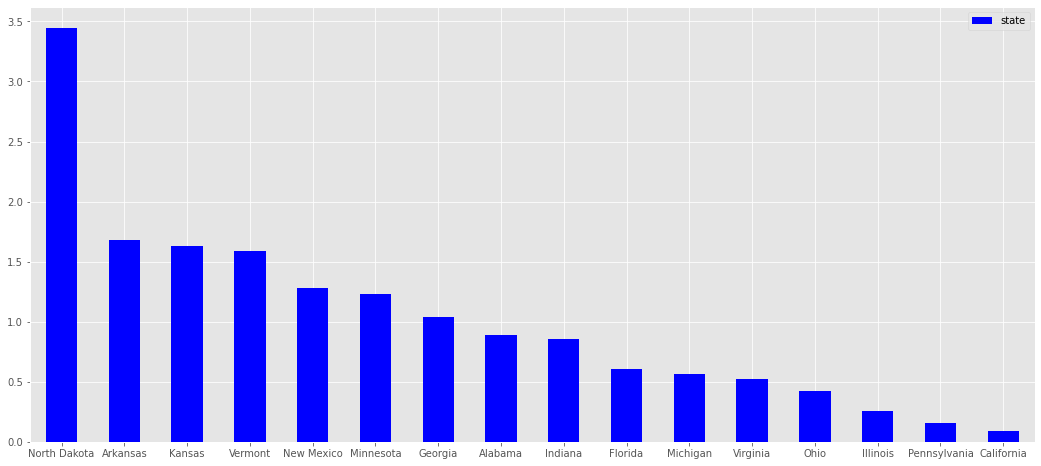

In [12]:
# percentage of missing geocode in each state
plt.style.use('ggplot')
missing_geo_code[missing_geo_code.notnull()].plot.bar(rot=0, figsize= (18,8), color='blue', legend='Percentage')

### Summary of question 2: 

Percentage of missing geocodes for each state  is very insignaficant. North Dakota has the most missing geocode with 3.44%, which makes a very minor impact on displaying haunted places on the map. California only has 0.093% of missing geocode. Furthermore, most states do not have missing geocode. Therefore, we can use city_longitude and city_latitude to create an interactive map. 

### Section 1.2 Restructure the data<a class="anchor" id="Restructure_the_data"></a> 

Show the number of haunted houses in each state

In [13]:
df_haunted_state=df_haunted.copy()
df_haunted_state.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


In [14]:
# count number of haunted houses in each state. 
df1=df_haunted_state.groupby('state').count()[['city']]

In [15]:
# As the dataset does not have geocode for state. Going to use mean value of longtitude and latitude
df2=df_haunted_state.groupby('state').mean()[['city_longitude','city_latitude']]

In [16]:
df_group_count=pd.concat([df1, df2], axis=1)
df_group_count.head()

,city,city_longitude,city_latitude
state,,,
Alabama,224,-86.699224,33.198773
Alaska,32,-148.017543,61.797674
Arizona,156,-111.303483,33.233818
Arkansas,119,-92.475767,35.093912
California,1070,-119.257591,35.360488


In [17]:
# Rename city to number of haunted houses
df_group_count.rename(columns={"city": "number_haunted_house"},inplace=True)
df_group_count.head()

,number_haunted_house,city_longitude,city_latitude
state,,,
Alabama,224,-86.699224,33.198773
Alaska,32,-148.017543,61.797674
Arizona,156,-111.303483,33.233818
Arkansas,119,-92.475767,35.093912
California,1070,-119.257591,35.360488


In [18]:
# save it as state_haunted.csv
df_group_count.to_csv('state_haunted_test.csv', index=True, encoding='utf-8',sep=',')

### Section1.3 Convert city_longitude, city_latitude to mercator coordinates<a class="anchor" id="convert"></a>  

In [19]:
state_haunted=pd.read_csv('state_haunted_test.csv')
state_haunted.head()

,state,number_haunted_house,city_longitude,city_latitude
0,Alabama,224,-86.699224,33.198773
1,Alaska,32,-148.017543,61.797674
2,Arizona,156,-111.303483,33.233818
3,Arkansas,119,-92.475767,35.093912
4,California,1070,-119.257591,35.360488


In [20]:
from pyproj import Proj, transform

def create_coordinates(long_arg,lat_arg):
    in_wgs = Proj(init='epsg:4326')
    out_mercator = Proj(init='epsg:3857')
    long, lat = long_arg, lat_arg
    mercator_x, mercator_y = transform(in_wgs, out_mercator, long, lat)
    
    return (mercator_x, mercator_y)


In [21]:
array_test=np.array(create_coordinates(state_haunted['city_longitude'],state_haunted['city_latitude']))

df_array_0=pd.DataFrame(array_test[0])
df_array_1=pd.DataFrame(array_test[1])

df_array=pd.concat([df_array_0, df_array_1],axis=1)
df_array.columns=['mercator_long','mercator_lat']
df_array.head()

,mercator_long,mercator_lat
0,-9.651314e+06,3.921718e+06
1,-1.647724e+07,8.811326e+06
2,-1.239025e+07,3.926381e+06
3,-1.029436e+07,4.176651e+06
4,-1.327569e+07,4.212979e+06


In [22]:
df_final_table=pd.concat([state_haunted,df_array],axis=1)
df_final_table.head()  

,state,number_haunted_house,city_longitude,city_latitude,mercator_long,mercator_lat
0,Alabama,224,-86.699224,33.198773,-9.651314e+06,3.921718e+06
1,Alaska,32,-148.017543,61.797674,-1.647724e+07,8.811326e+06
2,Arizona,156,-111.303483,33.233818,-1.239025e+07,3.926381e+06
3,Arkansas,119,-92.475767,35.093912,-1.029436e+07,4.176651e+06
4,California,1070,-119.257591,35.360488,-1.327569e+07,4.212979e+06


## Section 2. Create a map<a class="anchor" id="Create_a_map"></a>

###  Section 2.1 Import packages for Bokeh<a class="anchor" id="Import_packages"></a> 

In [58]:
# Standard imports for Bokeh
from bokeh.io import output_notebook, show, save,output_file
output_notebook()

# More tools for visualization using bokeh
from bokeh.models import LogColorMapper,HoverTool
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure, ColumnDataSource
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter

from bokeh.models.tiles import WMTSTileSource
from bokeh.tile_providers import get_provider, Vendors

from bokeh.tile_providers import ESRI_IMAGERY


Loading BokehJS ...

### Section 2.2 Create an interactive map<a class="anchor" id="Create_an_interactive_map"></a>

In [56]:
esri = get_provider(Vendors.ESRI_IMAGERY)

source = ColumnDataSource(data=dict(x=list(df_final_table['mercator_long']), 
                                    y=list(df_final_table['mercator_lat']),
                                    number=list(df_final_table['number_haunted_house']),
                                    sizes=list(df_final_table['number_haunted_house']/10),
                                    statename=list(df_final_table['state'])))

hover = HoverTool(tooltips=[
   ("state", "@statename"),
   ("housenumber","@number")])


p = figure(plot_width=1800, plot_height=1000,
           x_range=(-15187814,-6458032), y_range=(2505715,6567666),
           x_axis_type="mercator", y_axis_type="mercator",
           tooltips=[
                     ("state", "@statename"),
                     ("housenumber","@number")
                    ],
           title="Haunted Houses in America")

p.add_tile(esri)

p.circle(x='x',y='y', source=source,
         size='sizes', line_color="blue", fill_color="#FF0000",fill_alpha=0.5
        )

output_notebook()

show(p)

Loading BokehJS ...

In [57]:
# Save the map locally
output_notebook()

save(p)

Loading BokehJS ...

'C:\\Users\\DUJUAN~1\\AppData\\Local\\Temp\\tmpiflrslwh.html'

In [61]:
# Save the map seperately
output_file("haunted_houses.html")

save(p)

'C:\\Users\\Du Juan\\Documents\\Github Portfolio\\Haunted Houses in America\\haunted_houses.html'